In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import KFold, StratifiedKFold
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\codesITA\\RATIO'

In [2]:
import os
os.chdir('../../DatasetITA-OR/Train')
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA-OR\\Train'

In [3]:
data=[]
for l in os.listdir():
    if '.DS_Store' not in l:
        os.chdir(l)
        for m in os.listdir():
            data.append([l+'/'+m, l])
        os.chdir('..')

In [4]:
data

[['a/AC1_Word_a_15.png', 'a'],
 ['a/AC1_Word_a_15_01.png', 'a'],
 ['a/ACC_Word_a_02.png', 'a'],
 ['a/ACC_Word_a_02_01.png', 'a'],
 ['a/ACC_Word_a_02_02.png', 'a'],
 ['a/ACC_Word_a_02_03.png', 'a'],
 ['a/AC_Word_a_01.png', 'a'],
 ['a/AC_Word_a_01_01.png', 'a'],
 ['a/AC_Word_a_01_02.png', 'a'],
 ['a/AC_Word_a_01_03.png', 'a'],
 ['a/AC_Word_a_08.png', 'a'],
 ['a/AC_Word_a_08_01.png', 'a'],
 ['a/AC_Word_a_08_02.png', 'a'],
 ['a/AC_Word_a_08_03.png', 'a'],
 ['a/AL_Word_a_03.png', 'a'],
 ['a/AL_Word_a_03_01.png', 'a'],
 ['a/AL_Word_a_03_02.png', 'a'],
 ['a/AL_Word_a_03_03.png', 'a'],
 ['a/AL_Word_a_16.png', 'a'],
 ['a/AL_Word_a_16_01.png', 'a'],
 ['a/AL_Word_a_16_02.png', 'a'],
 ['a/AL_Word_a_16_03.png', 'a'],
 ['a/AR_Word_a_07.png', 'a'],
 ['a/AR_Word_a_07_01.png', 'a'],
 ['a/AR_Word_a_07_02.png', 'a'],
 ['a/AR_Word_a_07_03.png', 'a'],
 ['a/AR_Word_a_10.png', 'a'],
 ['a/AR_Word_a_10_01.png', 'a'],
 ['a/AR_Word_a_10_02.png', 'a'],
 ['a/AR_Word_a_10_03.png', 'a'],
 ['a/AS_Word_a_09.png', 'a']

In [5]:
os.getcwd()

'C:\\Users\\Daniele\\PycharmProjects\\LipNetProve\\DatasetITA-OR\\Train'

In [6]:
len(data)

1202

In [7]:
import csv
os.chdir('../../codesITA')
header = ['filename', 'label']

with open('training_labelsITA.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write multiple rows
    writer.writerows(data)

In [8]:
train_data = pd.read_csv('training_labelsITA.csv')
Y = train_data[['label']]

kf = KFold(n_splits = 5)

skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True)

In [9]:
idg = ImageDataGenerator(rescale=1./255)

In [10]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [11]:
def create_new_model():
    import os
    import numpy as np
    from keras.models import Sequential # To initialise the nn as a sequence of layers
    from keras.layers import Convolution2D # To make the convolution layer for 2D images
    from keras.layers import MaxPooling2D #
    from keras.layers import Flatten
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.callbacks import CSVLogger
    from tensorflow.keras.optimizers import RMSprop
    from keras.layers import BatchNormalization
    from tensorflow.keras.optimizers import Adam
    from keras.models import load_model
    from keras.callbacks import ModelCheckpoint
    from keras.layers import Activation
    from keras.layers import GlobalAveragePooling2D

    
    csv = CSVLogger("2_adam_60epochRatio.log")
    #filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    #checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    # Initialising the CNN

    # Initialising the CNN
    classifier = Sequential()

    # Step 1 - Convolution
    classifier.add(Convolution2D(32,(32,32),input_shape = (224,224,1), activation = 'relu',strides=8,name='convo1'))
    classifier.add(Convolution2D(64,(3,3), activation = 'relu',name='convo2'))
    classifier.summary()
    # Step 1 - Pooling
    classifier.add(MaxPooling2D(pool_size = (5,5)))
    classifier.summary()

    # Step 2 - Convolution
    #classifier.add(Convolution2D(32,(2,2),activation = 'relu',name='convo3',strides=2))
    # Step 2 - Pooling
    #classifier.add(MaxPooling2D(pool_size = (2,2)))
    # Step 3 - Convolution
    #classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo4'))
    # Step 3 - Pooling
    #classifier.add(MaxPooling2D(pool_size = (2,2)))
    #Step 4 - Flattening

    classifier.add(Flatten())

    classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(1024, activation = 'relu'))

    '''classifier.add(BatchNormalization())
    classifier.add(Dropout((0.5)))
    classifier.add(Dense(512, activation = 'relu'))
    '''

    classifier.add(BatchNormalization())
    classifier.add(Dropout((0.4)))
    classifier.add(Dense(10, activation = 'softmax'))

    return classifier




Found 961 validated image filenames belonging to 10 classes.
Found 241 validated image filenames belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23, 64)        18496     
                                                                 
Total params: 51,296
Trainable params: 51,296
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23

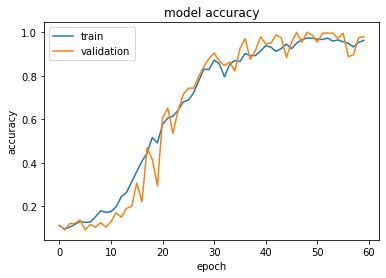

Found 961 validated image filenames belonging to 10 classes.
Found 241 validated image filenames belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23, 64)        18496     
                                                                 
Total params: 51,296
Trainable params: 51,296
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23

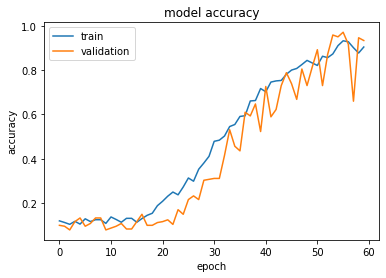

Found 962 validated image filenames belonging to 10 classes.
Found 240 validated image filenames belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23, 64)        18496     
                                                                 
Total params: 51,296
Trainable params: 51,296
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23

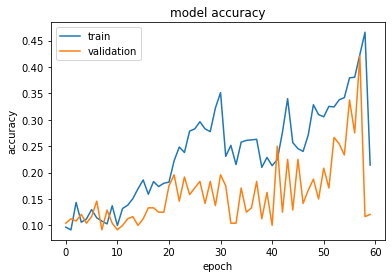

Found 962 validated image filenames belonging to 10 classes.
Found 240 validated image filenames belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23, 64)        18496     
                                                                 
Total params: 51,296
Trainable params: 51,296
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23

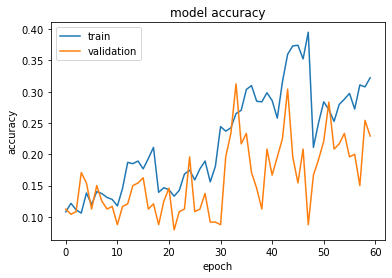

Found 962 validated image filenames belonging to 10 classes.
Found 240 validated image filenames belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23, 64)        18496     
                                                                 
Total params: 51,296
Trainable params: 51,296
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 25, 25, 32)        32800     
                                                                 
 convo2 (Conv2D)             (None, 23, 23

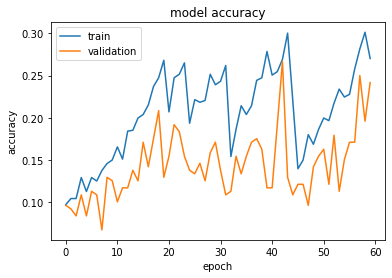

In [12]:
VALIDATION_ACCURACY = []
VALIDATION_LOSS = []

save_dir = 'saved_models(60epoch)ITARATIO-ORPM/'
fold_var = 1

for train_index, val_index in skf.split(np.zeros(len(data)),Y):
    training_data = train_data.iloc[train_index]
    validation_data = train_data.iloc[val_index]

    train_data_generator = idg.flow_from_dataframe(training_data, directory = '../DatasetITA-OR/Train',
                               x_col = "filename", y_col = "label",
                               class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)
    valid_data_generator  = idg.flow_from_dataframe(validation_data, directory =  '../DatasetITA-OR/Train',
                            x_col = "filename", y_col = "label",
                            class_mode = "categorical", shuffle = True, color_mode="grayscale",target_size=(224,224),batchsize=32)

    # CREATE NEW MODEL
    model = create_new_model()
    # COMPILE NEW MODEL
    model.compile(loss='categorical_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

    # CREATE CALLBACKS
    checkpoint = tf.keras.callbacks.ModelCheckpoint(save_dir+get_model_name(fold_var),
                            monitor='val_accuracy', verbose=1,
                            save_best_only=True, mode='max')
    callbacks_list = [checkpoint]
    # There can be other callbacks, but just showing one because it involves the model name
    # This saves the best model
    # FIT THE MODEL
    h = model.fit(train_data_generator,
                epochs=60,
                callbacks=callbacks_list,
                validation_data=valid_data_generator)
    #PLOT HISTORY
    #:
    #:

    # LOAD BEST MODEL to evaluate the performance of the model
    model.load_weights("saved_models(60epoch)ITARATIO-ORPM/model_"+str(fold_var)+".h5")
    

    results = model.evaluate(valid_data_generator)
    results = dict(zip(model.metrics_names,results))

    VALIDATION_ACCURACY.append(results['accuracy'])
    VALIDATION_LOSS.append(results['loss'])

    plt.plot(h.history['accuracy']) #validation
    plt.plot(h.history['val_accuracy']) #train
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    tf.keras.backend.clear_session()

    fold_var += 1

In [13]:
VALIDATION_ACCURACY

[1.0, 0.9709543585777283, 0.4208333194255829, 0.3125, 0.2666666805744171]

In [14]:
VALIDATION_LOSS

[0.039852894842624664,
 0.19360031187534332,
 1.7363842725753784,
 2.0189850330352783,
 2.4466822147369385]